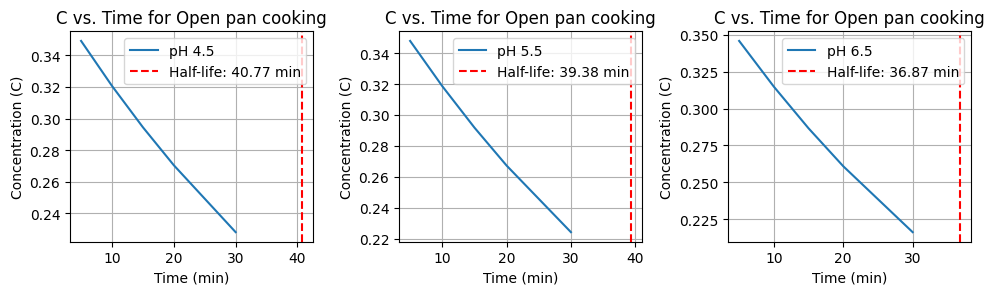

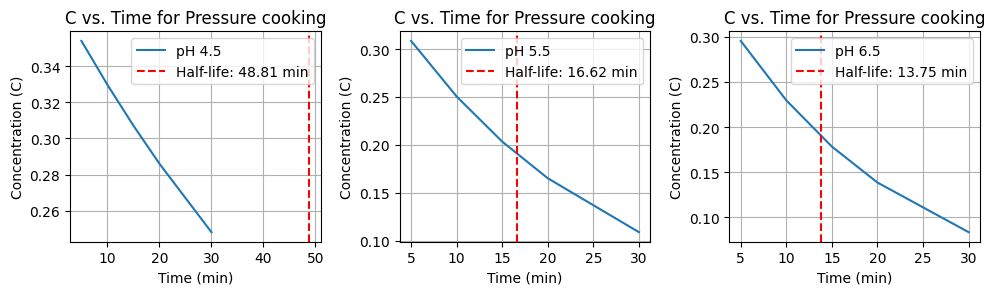

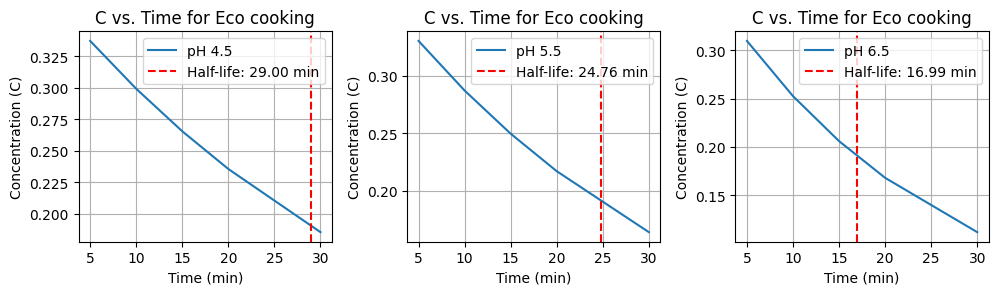

Half-life values:
Open pan cooking, pH 4.5: Half-life = 40.77 min
Open pan cooking, pH 5.5: Half-life = 39.38 min
Open pan cooking, pH 6.5: Half-life = 36.87 min
Pressure cooking, pH 4.5: Half-life = 48.81 min
Pressure cooking, pH 5.5: Half-life = 16.62 min
Pressure cooking, pH 6.5: Half-life = 13.75 min
Eco cooking, pH 4.5: Half-life = 29.00 min
Eco cooking, pH 5.5: Half-life = 24.76 min
Eco cooking, pH 6.5: Half-life = 16.99 min
Concentration at t = 20 min:
Open pan cooking, pH 4.5: Concentration = 0.27047
Open pan cooking, pH 5.5: Concentration = 0.26725
Open pan cooking, pH 6.5: Concentration = 0.26091
Pressure cooking, pH 4.5: Concentration = 0.28605
Pressure cooking, pH 5.5: Concentration = 0.16504
Pressure cooking, pH 6.5: Concentration = 0.13868
Eco cooking, pH 4.5: Concentration = 0.23561
Eco cooking, pH 5.5: Concentration = 0.21706
Eco cooking, pH 6.5: Concentration = 0.16803


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the function to calculate concentration at time t
def concentration(t, C0, k):
    return C0 * np.exp(-k * t)

# Define the time range
t_values = np.array([5, 10, 15, 20, 30])  # Time for cooking in minutes

# Define the initial concentration
C0 = 0.38  # Initial concentration, adjust as needed

# Define the rate constants (k values) for different methods, pH, and temperatures
rate_constants = {
    'Open pan cooking': {
        4.5: 0.017,
        5.5: 0.0176,
        6.5: 0.0188
    },
    'Pressure cooking': {
        4.5: 0.0142,
        5.5: 0.0417,
        6.5: 0.0504
    },
    'Eco cooking': {
        4.5: 0.0239,
        5.5: 0.028,
        6.5: 0.0408
    }
}

# Plot concentration versus time for each cooking method and pH level
for method, ph_k_values in rate_constants.items():
    plt.figure(figsize=(10, 8))
    i = 1  # Subplot index
    for ph, k in ph_k_values.items():
        Ct = concentration(t_values, C0, k)
        plt.subplot(3, 3, i)
        plt.plot(t_values, Ct, label=f'pH {ph}')
        
        half_concentration = C0 / 2
        half_life = fsolve(lambda t: concentration(t, C0, k) - half_concentration, 0)[0]
        plt.axvline(x=half_life, color='r', linestyle='--', label=f'Half-life: {half_life:.2f} min')

        plt.xlabel('Time (min)')
        plt.ylabel('Concentration (C)')
        plt.title(f'C vs. Time for {method}')
        plt.legend()
        plt.grid(True)
        i += 1
    plt.tight_layout()
    plt.show()

# Print half-life values for each cooking method and pH level
print("Half-life values:")
for method, ph_k_values in rate_constants.items():
    for ph, k in ph_k_values.items():
        # Calculate the time to reach half of the initial concentration (half-life)
        half_concentration = C0 / 2
        half_life = fsolve(lambda t: concentration(t, C0, k) - half_concentration, 0)[0]
        print(f"{method}, pH {ph}: Half-life = {half_life:.2f} min")

# Calculate concentration at a given time for each cooking method and pH level
given_time = 20  # Adjust as needed
print(f'Concentration at t = {given_time} min:')
for method, ph_k_values in rate_constants.items():
    for ph, k in ph_k_values.items():
        Ct_given_time = concentration(given_time, C0, k)
        print(f"{method}, pH {ph}: Concentration = {Ct_given_time:.5f}")